# **데이터 불러오기**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/My Drive/project4/bumble_google_play_reviews.csv')
df.head(3)

reviewId          userName  \
0  gp:AOqpTOHzFnRT8OteZT0bORvHDjfo2rRVbMlDxC9Ncmn...    Andrew Bogwald   
1  gp:AOqpTOGUCzQdBXuib31Wuh_eA9_HVrvkDl_kp8GkDkD...    kapil shrimali   
2  gp:AOqpTOHevqi_O90Ak_K0bsc-Mcc6PVY7KvK_98QGpBR...  Hossein Abedi K.   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AATXAJ...   
1  https://play-lh.googleusercontent.com/a-/AOh14...   
2  https://play-lh.googleusercontent.com/a-/AOh14...   

                                             content  score  thumbsUpCount  \
0  It's funny, I didn't really get any matches un...      1              0   
1                            It is a fun experience!      4              0   
2  Even paying isn't good enough They'll hide peo...      1              0   

  reviewCreatedVersion                   at  \
0              5.263.1  2022-04-04 23:25:28   
1              5.263.1  2022-04-04 23:23:42   
2              5.260.0  2022-04-04 23:03:11   

                                        replyContent            repliedAt  
0  Hi Andrew, our team would love the opportunity...  2021-07-26 08:55:24  
1                                                NaN                  NaN  
2                                                NaN                  NaN

In [4]:
df.tail(3)

reviewId          userName  \
105951  gp:AOqpTOEjLo1SOe9tXtwo4oDEmWnwwYDjxbr_QNa8cBo...            Phil T   
105952  gp:AOqpTOHBUyrp_Iga7bBPSgq8do2pGbk5Fp7qRTtVy48...  Alexander Khozya   
105953  gp:AOqpTOEhR4C-Ep8Fznetxvz4CkhpPK4Fx08EzDYTInF...   Mike Kulasinski   

                                                userImage  \
105951  https://play-lh.googleusercontent.com/a/AATXAJ...   
105952  https://play-lh.googleusercontent.com/a-/AOh14...   
105953  https://play-lh.googleusercontent.com/a-/AOh14...   

                                                  content  score  \
105951  Finally, an app where women have to start the ...      4   
105952                   At last we have Android version!      5   
105953                                   Nice and smooth.      5   

        thumbsUpCount reviewCreatedVersion                   at replyContent  \
105951              2                1.0.1  2015-12-01 00:18:53          NaN   
105952             60                1.0.0  2015-11-30 21:27:51          NaN   
105953             52                  NaN  2015-11-29 23:15:25          NaN   

       repliedAt  
105951       NaN  
105952       NaN  
105953       NaN

# **EDA**

In [5]:
%%capture
!pip install -U pandas-profiling
import pandas_profiling

In [6]:
%%capture
!pip install wordcloud
from wordcloud import WordCloud

In [7]:
df.shape

(105954, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105954 entries, 0 to 105953
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              105954 non-null  object
 1   userName              105954 non-null  object
 2   userImage             105954 non-null  object
 3   content               105950 non-null  object
 4   score                 105954 non-null  int64 
 5   thumbsUpCount         105954 non-null  int64 
 6   reviewCreatedVersion  89116 non-null   object
 7   at                    105954 non-null  object
 8   replyContent          61558 non-null   object
 9   repliedAt             61558 non-null   object
dtypes: int64(2), object(8)
memory usage: 8.1+ MB


In [ ]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 1) 필요없는 컬럼 제거

In [6]:
# 필요없는 columns 제거

# 방법1
df_new = df.loc[:,['content','score']]

# 방법2
# df_new = df[['content','score']]

df_new.head(3)

content  score
0  It's funny, I didn't really get any matches un...      1
1                            It is a fun experience!      4
2  Even paying isn't good enough They'll hide peo...      1

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105954 entries, 0 to 105953
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  105950 non-null  object
 1   score    105954 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


## 2) 결측치 확인 후 제거

In [7]:
# 결측치 확인 후 제거하기
# 'content' 열 결측치 확인: 4개 발견

df_new[df_new['content'].isnull()]

content  score
36137     NaN      4
44671     NaN      1
59547     NaN      5
80046     NaN      3

In [8]:
# 'content' 열 결측치 포함된 행 4개 제거: 105954 -> 105950
# 일부 행 삭제했으니까 인덱스가 틀어지므로 리셋까지 해주어야 한다.

df_new.dropna(subset=['content'], inplace=True)
df_new.reset_index(drop=True, inplace=True)

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105950 entries, 0 to 105949
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  105950 non-null  object
 1   score    105950 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [14]:
df_new[-20:-1]

content  score
105930  Swiping is easy but but messaging will not wor...      3
105931  The UI is pretty and fine tuned, and signing u...      4
105932  The app goes through about three people in the...      2
105933  I am unable to sign in with my Facebook accoun...      1
105934  Works fine but can you please turn off the mat...      4
105935  Pretty sure 90% of these guys are bots. Just t...      1
105936  Just downloaded app and Im very excited about ...      5
105937  It took a year to come to android. Shows the o...      1
105938  So I've begun conversations with 15 matches, b...      2
105939  Tinder was getting ridiculous. The last straw ...      5
105940  I have the app on my iPad and the UI here is w...      5
105941                                      Trying it out      5
105942  My operating system has autorotation of images...      2
105943                                         Works well      5
105944                                            Finally      5
105945                                      Finally here!      5
105946                                           Finally!      5
105947  Finally, an app where women have to start the ...      4
105948                   At last we have Android version!      5

## 3) 중복값 확인 후 제거

### 중복 확인 1차

In [9]:
# 전체데이터 갯수, content열 유니크 갯수, score열 유니크 갯수

len(df_new), df_new['content'].nunique(), df_new['score'].nunique()

(105950, 91468, 5)

In [10]:
# STEP 1) 'content' 와 'score' 모두 중복인 데이터 먼저 제거
# STEP 2) 'content'만 중복인 데이터는 STEP 1 진행한 뒤 나온 결과 보면서 어떻게 처리할지 고민하기.

print(df_new.duplicated().sum())             # 'content' 와 'score' 모두 중복 건 중 하나만 남기고 드롭해야할 갯수
print(df_new.duplicated(['content']).sum())  # 'content' 만 중복 건 중 하나만 남기고 드롭해야할 갯수

13351
14482


In [11]:
# 전체 피쳐에 대해 전부 중복값을 갖는 행 모두 출력 (중복된 값이 전부 같이보이게)

dup_all = df_new[df_new.duplicated(['content', 'score'], keep=False) == True]
dup_all.head(5)

content  score
9   Very easy to use.      5
15               Good      5
17             Awsome      5
22               Good      5
32           Horrible      1

In [12]:
# 예시로 'content' 열에 'Good' 문자열 중복 보기 (1270개)
# => 동일한 문자열에 점수는 다른게 보인다.
# => 일단 Good 5점 하나, Good 4점 하나 남기고 제거하는 방식으로 진행

dup_all[dup_all['content']=='Good']

content  score
15        Good      5
22        Good      5
55        Good      5
113       Good      5
228       Good      5
...        ...    ...
105184    Good      5
105342    Good      5
105503    Good      4
105514    Good      5
105533    Good      3

[1270 rows x 2 columns]

In [19]:
dup_all[(dup_all['content']=='Good') & (dup_all['score']==5)]   # 'Good' 이면서 점수 5점인 데이터 (934개)

content  score
15        Good      5
22        Good      5
55        Good      5
113       Good      5
228       Good      5
...        ...    ...
104211    Good      5
105073    Good      5
105184    Good      5
105342    Good      5
105514    Good      5

[934 rows x 2 columns]

In [20]:
dup_all[(dup_all['content']=='Good') & (dup_all['score']==4)]   # 'Good' 이면서 점수 4점인 데이터 (252개)

content  score
546       Good      4
621       Good      4
986       Good      4
1099      Good      4
1368      Good      4
...        ...    ...
102163    Good      4
102942    Good      4
104947    Good      4
105042    Good      4
105503    Good      4

[252 rows x 2 columns]

In [13]:
# 중복 갯수 확인

dup_all = df_new[df_new.duplicated(['content', 'score'], keep=False) == True]
dup_all_drop = df_new[df_new.duplicated(['content', 'score'], keep='first') == True]

print('중복값 전체갯수: ', len(dup_all))
print('중복값 전체갯수 중 하나만 남기고 drop필요: ', len(dup_all_drop))

중복값 전체갯수:  15144
중복값 전체갯수 중 하나만 남기고 drop필요:  13351


In [14]:
## 전체 15144개 중복 행들중에서 각 중복에 대해 unique 하나만 남기고 나머지는 drop 처리
## 리셋 인덱스 실행

df_new_rev1=df_new.drop_duplicates(keep='first')
df_new_rev1.reset_index(drop=True, inplace=True)

print('drop후: ', len(df_new_rev1))
print('drop전: ', len(df_new))
print('검산: ', len(df_new_rev1)+len(dup_all_drop))

drop후:  92599
drop전:  105950
검산:  105950


### 중복 확인 2차 (제거 보류)

In [15]:
# 전체데이터 갯수, content열 유니크 갯수, score열 유니크 갯수

len(df_new_rev1), df_new_rev1['content'].nunique(), df_new_rev1['score'].nunique()

(92599, 91468, 5)

In [16]:
# 중복 확인

print(df_new_rev1.duplicated().sum())             # 'content' 와 'score' 모두 중복 ---> 1차에서 제거완료하여, 드랍할 것이 없음.
print(df_new_rev1.duplicated(['content']).sum())  # 'content' 만 중복 ----------------> 내용은 중복인데 score 가 다른 것들임!

0
1131


In [17]:
dup_content_rev1 = df_new_rev1[df_new_rev1.duplicated(['content'], keep=False) == True]
dup_content_rev1.head(5)

content  score
9   Very easy to use.      5
15               Good      5
17             Awsome      5
31           Horrible      1
41          great app      5

In [26]:
# 예시 "Good" 1,2,3,4,5 점 존재

dup_content_rev1[dup_content_rev1['content']=='Good']

content  score
15       Good      5
517      Good      4
558      Good      1
1865     Good      3
16888    Good      2

In [27]:
# 예시 "Horrible" 1,2,3,5 점 존재

dup_content_rev1[dup_content_rev1['content']=='Horrible']

content  score
31     Horrible      1
35031  Horrible      2
51898  Horrible      3
53385  Horrible      5

In [28]:
# content 열에 대해서만 중복인 값들의 유니크값

content_unique_rev1 = dup_content_rev1['content'].unique()
content_unique_rev1.sort()
content_unique_rev1

# len(content_unique_rev1)
# 876개

# 구두점, 특수문자, 이모지 등 이런거 하나가 포함되어서 유니크 값으로 나온게 많아보인다.
# 어떻게 처리할까? 지금 이 단계에서 처리하기보다, 구두점/특수문자/이모지 제거해보고 나서 -> 전체 중복 제거 한번 더 해준 뒤 -> 그때 유니크 값이 많이 줄어 들어 있다면 임의로 수작업 라벨링

array(['50/50', 'A good app', 'A+', 'Aaa', 'Acceptable', 'Aight',
       'All good', 'All good!', 'Alright', 'Amazing', 'Amazing app',
       'Amazing app!!', 'Amazing experience', 'Annoying',
       'App not opening', 'Average', 'Awesome', 'Awesome app',
       'Awesome app!', 'Awesome app.', 'Awesome site', 'Awesome thanks',
       'Awesome 😊', 'Awesome!', 'Awesome!!', 'Awesome..', 'Awful',
       'Awsome', 'Bad', 'Bad app', 'Bakwas', 'Bee', 'Bekar', 'Best',
       'Best app', 'Best dating app', 'Best dating app ever!',
       'Best dating app ever.', 'Best dating app.', 'Best out there',
       'Better', 'Better than Hinge', 'Better than Tinder',
       'Better than Tinder!', 'Better than Tinder.', 'Better than most',
       'Better than most dating apps', 'Better than other dating apps',
       'Better than other dating sites', 'Better than others',
       'Better than the others', 'Better than the rest',
       'Better than tinder', 'Better than tinder for sure',
       'Better th

In [18]:
# 중복 갯수 확인

dup_content_rev1 = df_new_rev1[df_new_rev1.duplicated(['content'], keep=False) == True]
dup_content_rev1_drop = df_new_rev1[df_new_rev1.duplicated(['content'], keep='first') == True]

print('중복값 전체갯수: ', len(dup_content_rev1))
print('중복값 전체갯수 중 하나만 남기고 drop필요: ', len(dup_content_rev1_drop))

중복값 전체갯수:  2007
중복값 전체갯수 중 하나만 남기고 drop필요:  1131


## 4) EDA

In [30]:
# 각 텍스트 리뷰의 길이 분포 확인

df_new_rev1_len = df_new_rev1['content'].apply(len)
df_new_rev1_len

0        110
1         23
2        107
3         28
4         23
        ... 
92594     13
92595      8
92596    179
92597     32
92598     16
Name: content, Length: 92599, dtype: int64

In [19]:
%matplotlib inline

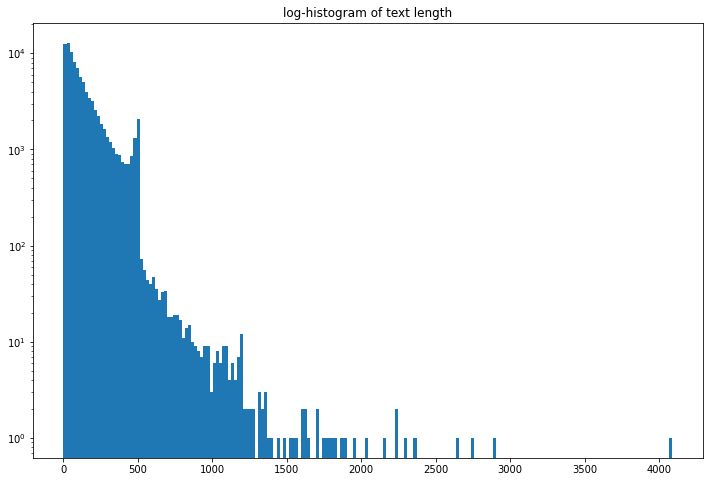

In [33]:
plt.figure(figsize=(12,8))
plt.hist(df_new_rev1_len, bins=200)
plt.yscale('log', nonposy='clip')
plt.title('log-histogram of text length');

In [34]:
print(f'텍스트 길이 최대값: {np.max(df_new_rev1_len)}')
print(f'텍스트 길이 최소값: {np.min(df_new_rev1_len)}')
print(f'텍스트 길이 중간값: {np.median(df_new_rev1_len)}')
print(f'텍스트 길이 평균: {np.mean(df_new_rev1_len)}')
print(f'텍스트 길이 표준편차: {np.std(df_new_rev1_len)}')

텍스트 길이 최대값: 4088
텍스트 길이 최소값: 1
텍스트 길이 중간값: 90.0
텍스트 길이 평균: 137.79466300931975
텍스트 길이 표준편차: 141.32290025676156


In [35]:
# 각 텍스트 리뷰당 포함된 단어 갯수 분포 확인

df_new_rev1_count = df_new_rev1['content'].apply(lambda x:len(x.split(' ')))
df_new_rev1_count

0        23
1         5
2        19
3         6
4         5
         ..
92594     2
92595     1
92596    34
92597     6
92598     3
Name: content, Length: 92599, dtype: int64

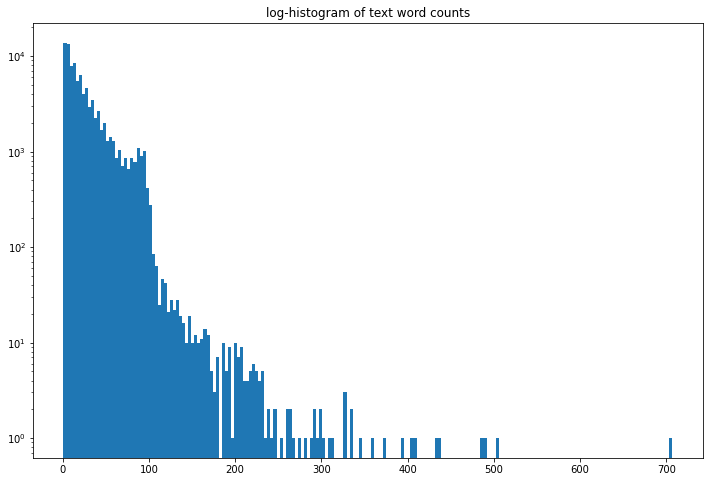

In [36]:
plt.figure(figsize=(12,8))
plt.hist(df_new_rev1_count, bins=200)
plt.yscale('log', nonposy='clip')
plt.title('log-histogram of text word counts');

In [37]:
print(f'텍스트 하나당 단어 갯수 최대값: {np.max(df_new_rev1_count)}')
print(f'텍스트 하나당 단어 갯수 최소값: {np.min(df_new_rev1_count)}')
print(f'텍스트 하나당 단어 갯수 중간값: {np.median(df_new_rev1_count)}')
print(f'텍스트 하나당 단어 갯수 평균: {np.mean(df_new_rev1_count)}')
print(f'텍스트 하나당 단어 갯수 표준편차: {np.std(df_new_rev1_count)}')

텍스트 하나당 단어 갯수 최대값: 707
텍스트 하나당 단어 갯수 최소값: 1
텍스트 하나당 단어 갯수 중간값: 17.0
텍스트 하나당 단어 갯수 평균: 26.000172788043066
텍스트 하나당 단어 갯수 표준편차: 26.430114979743887


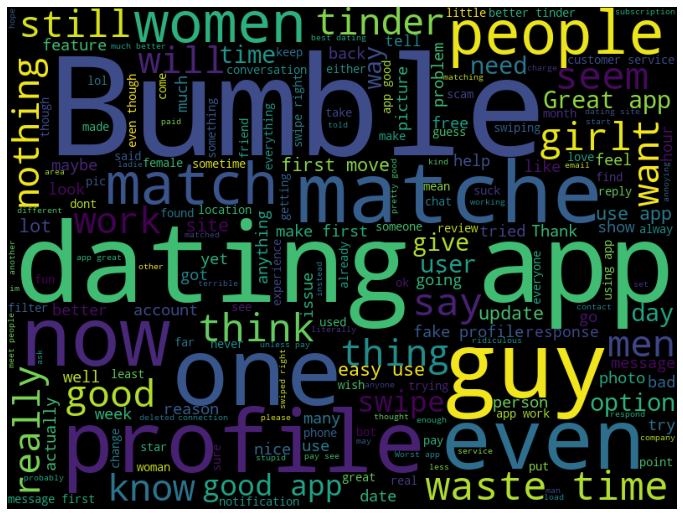

In [ ]:
# 텍스트 리뷰에 가장 많이 사용된 단어 확인하기 (WordCloud)

cloud = WordCloud(width=800, height=600).generate(" ".join(df_new_rev1['content']))
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis('off');

In [38]:
# 각 텍스트 리뷰 특징 파악

capital = np.mean(df_new_rev1['content'].apply(lambda x: max([i.isupper() for i in x])))
print(f'대문자가 포함된 텍스트리뷰 비율: {capital*100:.2f}%')

qmark = np.mean(df_new_rev1['content'].apply(lambda x: '?' in x))
print(f'물음표가 포함된 텍스트리뷰 비율: {qmark*100:.2f}%')

comma = np.mean(df_new_rev1['content'].apply(lambda x: ',' in x))
print(f'쉼표가 포함된 텍스트리뷰 비율: {comma*100:.2f}%')

close = np.mean(df_new_rev1['content'].apply(lambda x: '.' in x))
print(f'마침표가 포함된 텍스트리뷰 비율: {close*100:.2f}%')

enter = np.mean(df_new_rev1['content'].apply(lambda x: '\n' in x))
print(f'\\n가 포함된 텍스트리뷰 비율: {enter*100:.2f}%')

대문자가 포함된 텍스트리뷰 비율: 91.56%
물음표가 포함된 텍스트리뷰 비율: 6.52%
쉼표가 포함된 텍스트리뷰 비율: 32.29%
마침표가 포함된 텍스트리뷰 비율: 64.78%
\n가 포함된 텍스트리뷰 비율: 2.04%


In [39]:
# 랜덤으로 데이터 몇개 살펴보던 중, 이모지 발견
# 이모지 데이터는 작성자의 의견,감성,감정이 많이 담겨있는 중요한 데이터이다.
# SNS, 온라인에서는 이모지를 활용하여 소통하는 빈도가 매우 높다.
# 이러한 관점에서 분석 목적에 맞추어 이모지 데이터를 어떤 식으로 치환 or 제거할 것인지 고민이 필요하다.
# 일단 시간상 삭제 ---> 추후 보완 필요
print(df_new_rev1['content'][0])
print(df_new_rev1['content'][22])

It's funny, I didn't really get any matches until I paid for a week... All of a sudden I'm getting blown up. 👀
❤️_ _ _ _ _ ❤️


In [ ]:
# 이모지가 포함된 텍스트 리뷰 비율: 추후 알아보기

In [40]:
# target 분포 확인하기

df_new_rev1['score'].value_counts(normalize=True)

1    0.438007
5    0.234819
4    0.129937
2    0.105325
3    0.091912
Name: score, dtype: float64

In [41]:
df_new_rev1_score = df_new_rev1['score'].value_counts()
df_new_rev1_score

1    40559
5    21744
4    12032
2     9753
3     8511
Name: score, dtype: int64

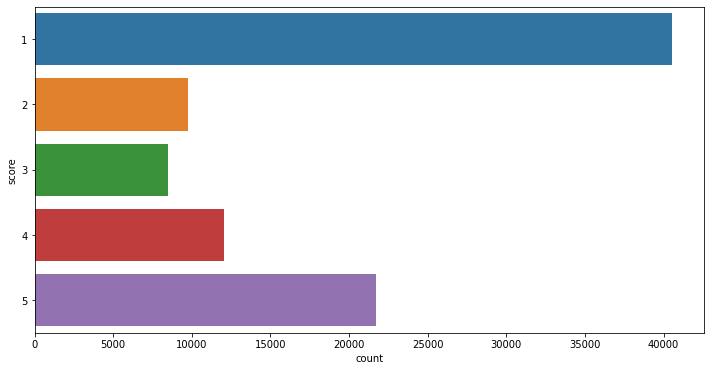

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(y='score', data=df_new_rev1, orient='h')  # order = df_new['score'].value_counts().index ---> 값을 기준으로 정렬할 때

plt.show();

In [ ]:
df_new_rev1[df_new_rev1['score'] == 1].head(5)

content  score
0  It's funny, I didn't really get any matches un...      1
2  Even paying isn't good enough They'll hide peo...      1
3                       Try another app this is lame      1
7              Why can i only pay with Google wallet      1
8  They locked up the advanced filters so you can...      1

In [ ]:
df_new_rev1[df_new_rev1['score'] == 2].head(5)

content  score
27  Idk man, the app works as designed I suppose. ...      2
51  Non paid member. I swiped no on about 8 women ...      2
53  Why do only men have to pay and the woman don'...      2
62  I am using an android phone, i have dowloaded ...      2
64  I liked it but in order to see who liked you b...      2

In [ ]:
df_new_rev1[df_new_rev1['score'] == 3].head(5)

content  score
6   Well they keep banned my account from bumble b...      3
47  It's a a easy to use app and you get some matc...      3
48  Well, app has a lot of potential, but not bein...      3
59                                     bugs & hanging      3
68  I am trying and trying to connect my Instagram...      3

In [ ]:
df_new_rev1[df_new_rev1['score'] == 4].head(5)

content  score
1                             It is a fun experience!      4
5   Linds interfaz, fácil de usar... odio la ubica...      4
19                        Money hungry and no matches      4
20  It's good that girl have to make first move bu...      4
23  There are no matches. There should be more mat...      4

In [ ]:
df_new_rev1[df_new_rev1['score'] == 5].head(5)

content  score
4   -it gave me cold pizza-      5
9         Very easy to use.      5
15                     Good      5
17                   Awsome      5
22           ❤️_ _ _ _ _ ❤️      5

In [ ]:
df_new_rev1.head(7)

content  score
0  It's funny, I didn't really get any matches un...      1
1                            It is a fun experience!      4
2  Even paying isn't good enough They'll hide peo...      1
3                       Try another app this is lame      1
4                            -it gave me cold pizza-      5
5  Linds interfaz, fácil de usar... odio la ubica...      4
6  Well they keep banned my account from bumble b...      3



---



# **데이터 전처리**

## 1) 축약형 확장, 특수문자 제거, 소문자 통일

In [43]:
# 상위 단어 추출: squarify 설치
%%capture 
!pip install squarify
import squarify

In [20]:
# 축약형 확장 라이브러리
%%capture 
!pip install contractions
import contractions

In [21]:
# 정규식
import re

# 불용어 처리: spacy 설치
import spacy
en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words

In [22]:
def pp1(text):

  # contractions 확장 처리
  expanded_text = contractions.fix(text)

  # 영어가 아닌 모든 것(숫자,특수문자,이모지 등) 제거
  complaints = re.sub("[^a-zA-Z ]","",expanded_text)

  # 소문자로 통일
  words = complaints.lower().split()
  sentences = " ".join(words)

  # return words
  return sentences

In [23]:
# df_new_rev1['words_pp1'] = df_new_rev1['content'].apply(pp1)
df_new_rev1['content_pp1'] = df_new_rev1['content'].apply(pp1)
df_new_rev1.head()

# df_new_rev1.drop(["words_pp1"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


content  score  \
0  It's funny, I didn't really get any matches un...      1   
1                            It is a fun experience!      4   
2  Even paying isn't good enough They'll hide peo...      1   
3                       Try another app this is lame      1   
4                            -it gave me cold pizza-      5   

                                         content_pp1  
0  it is funny i did not really get any matches u...  
1                             it is a fun experience  
2  even paying is not good enough they will hide ...  
3                       try another app this is lame  
4                              it gave me cold pizza

In [49]:
df_new_rev1['words_pp1'].apply(len)

0        25
1         5
2        22
3         6
4         5
         ..
92594     2
92595     1
92596    33
92597     6
92598     3
Name: words_pp1, Length: 92599, dtype: int64

In [24]:
# 단어 카운트 함수 만들기

from collections import Counter

def word_count(docs):

    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [51]:
wc = word_count(df_new_rev1['words_pp1'])
wc.head(20)

word  word_in_docs  count  rank   percent  cul_percent  \
4       i         39249  85785   1.0  0.035180     0.035180   
130    to         42075  79861   2.0  0.032750     0.067930   
120   the         38946  76248   3.0  0.031268     0.099198   
13      a         33560  54633   4.0  0.022404     0.121603   
87    and         33812  53693   5.0  0.022019     0.143621   
8     not         35617  52205   6.0  0.021409     0.165030   
2      it         32966  51046   7.0  0.020933     0.185964   
17     is         32340  48825   8.0  0.020023     0.205986   
42    app         35082  45111   9.0  0.018500     0.224486   
38    you         21898  40583  10.0  0.016643     0.241128   
18     of         23336  32617  11.0  0.013376     0.254504   
3     for         22362  29876  12.0  0.012252     0.266756   
146  have         21406  29210  13.0  0.011979     0.278735   
43   this         20042  25673  14.0  0.010528     0.289263   
182  that         16908  23131  15.0  0.009486     0.298749   
90     my         15818  21900  16.0  0.008981     0.307730   
86    but         18013  21233  17.0  0.008707     0.316437   
249    on         16217  20465  18.0  0.008392     0.324830   
37     do         15479  19245  19.0  0.007892     0.332722   
193    in         15151  19196  20.0  0.007872     0.340594   

     word_in_docs_percent  
4                0.423860  
130              0.454379  
120              0.420588  
13               0.362423  
87               0.365144  
8                0.384637  
2                0.356008  
17               0.349248  
42               0.378859  
38               0.236482  
18               0.252011  
3                0.241493  
146              0.231169  
43               0.216439  
182              0.182594  
90               0.170823  
86               0.194527  
249              0.175131  
37               0.167162  
193              0.163619

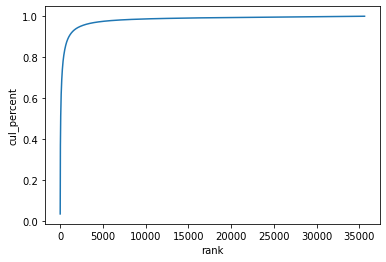

In [ ]:
# 단어의 누적 분포 그래프 그리기

sns.lineplot(x='rank', y='cul_percent', data=wc);

In [ ]:
wc[wc['rank'] <= 1000]['cul_percent'].max()

0.8986755759907559

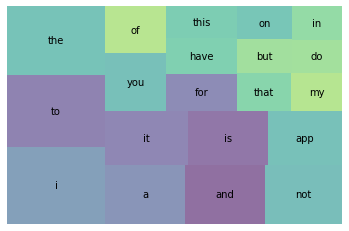

In [ ]:
# Squarify 라이브러리를 사용 -> 등장 비율 상위 20개 단어의 결과를 시각화

wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

# 대부분 불용어인 것을 확인 할 수 있다.

### 중복 확인 3차

In [25]:
# 전체데이터 갯수, content열 유니크 갯수, score열 유니크 갯수

len(df_new_rev1), df_new_rev1['content_pp1'].nunique(), df_new_rev1['score'].nunique()

(92599, 87995, 5)

In [26]:
# 중복 확인

print(df_new_rev1.duplicated(['content_pp1','score']).sum())   # 'content' 와 'score' 모두 중복 건 중 하나만 남기고 드롭해야할 갯수
print(df_new_rev1.duplicated(['content_pp1']).sum())           # 'content' 만 중복 건 중 하나만 남기고 드롭해야할 갯수 ----------------> 내용이 같은데 score 가 다름

3431
4604


In [27]:
# 전체 피쳐에 대해 전부 중복값을 갖는 행 모두 출력 (중복된 값이 전부 같이보이게)

dup_all_pp1 = df_new_rev1[df_new_rev1.duplicated(['content_pp1', 'score'], keep=False) == True]
dup_all_pp1.head(5)

content  score       content_pp1
9   Very easy to use.      5  very easy to use
15               Good      5              good
17             Awsome      5            awsome
22     ❤️_ _ _ _ _ ❤️      5                  
31           Horrible      1          horrible

In [28]:
# 예시로 'content' 열에 'good' 문자열 중복 보기 (48개)
# => 동일한 문자열에 점수는 다른게 보인다.
# => 일단 good 5점 하나, good 4점 하나 남기고 제거하는 방식으로 진행

dup_all_pp1[dup_all_pp1['content_pp1']=='good']

content  score content_pp1
15               Good      5        good
517              Good      4        good
558              Good      1        good
840              good      5        good
931              good      4        good
1005            Good.      5        good
1636           Good .      5        good
1865             Good      3        good
3231           good 😉      5        good
5136           GOOD 👍      5        good
5585           Good 👍      5        good
7674           Good !      4        good
9639           Good 😊      5        good
12959          Good 😁      5        good
16888            Good      2        good
17766  Good 👍🏻👍🏻👍🏻😜😃😎      4        good
20763         Good !!      5        good
21067           Good?      5        good
21851           Good!      5        good
22356         Good! 👌      5        good
23022           Good👍      5        good
25542          👍 good      5        good
26874           Good.      4        good
27113           👍good      5        good
28244         Good :)      4        good
31588           Good.      3        good
32517           good.      4        good
37371        Good 👍🏻👌      5        good
40750           ,good      5        good
44066         Good 😊😊      4        good
47579            good      3        good
47740   Good ........      4        good
47856          Good 🙂      4        good
50422          Good .      4        good
51876         👍🏾Good.      5        good
52526           Good!      4        good
52949           good.      5        good
53660          Good 🤗      4        good
56638           good!      3        good
59260          👍 good      4        good
59817            GOOD      5        good
60120            good      1        good
62366          good..      4        good
62921            good      2        good
65194           good!      4        good
66728         good :)      5        good
69095        Good. ..      5        good
74553          Good..      4        good

In [59]:
dup_all_pp1[(dup_all_pp1['content_pp1']=='good') & (dup_all_pp1['score']==5)]   # 'good' 이면서 점수 5점인 데이터 (23개)

content  score words_pp1 content_pp1
15         Good      5    [good]        good
840        good      5    [good]        good
1005      Good.      5    [good]        good
1636     Good .      5    [good]        good
3231     good 😉      5    [good]        good
5136     GOOD 👍      5    [good]        good
5585     Good 👍      5    [good]        good
9639     Good 😊      5    [good]        good
12959    Good 😁      5    [good]        good
20763   Good !!      5    [good]        good
21067     Good?      5    [good]        good
21851     Good!      5    [good]        good
22356   Good! 👌      5    [good]        good
23022     Good👍      5    [good]        good
25542    👍 good      5    [good]        good
27113     👍good      5    [good]        good
37371  Good 👍🏻👌      5    [good]        good
40750     ,good      5    [good]        good
51876   👍🏾Good.      5    [good]        good
52949     good.      5    [good]        good
59817      GOOD      5    [good]        good
66728   good :)      5    [good]        good
69095  Good. ..      5    [good]        good

In [29]:
# 중복 갯수 확인

dup_all_pp1 = df_new_rev1[df_new_rev1.duplicated(['content_pp1', 'score'], keep=False) == True]
dup_all_pp1_drop = df_new_rev1[df_new_rev1.duplicated(['content_pp1', 'score'], keep='first') == True]

print('중복값 전체갯수: ', len(dup_all_pp1))
print('중복값 전체갯수 중 하나만 남기고 drop필요: ', len(dup_all_pp1_drop))

중복값 전체갯수:  4839
중복값 전체갯수 중 하나만 남기고 drop필요:  3431


In [30]:
## 전체 4839개 중복 행들중에서 각 중복에 대해 unique 하나만 남기고 나머지는 drop 처리
## 리셋 인덱스 실행

df_new_rev2=df_new_rev1.drop_duplicates(['content_pp1', 'score'], keep='first')
df_new_rev2.reset_index(drop=True, inplace=True)

print('drop후: ', len(df_new_rev2))
print('drop전: ', len(df_new_rev1))
print('검산: ', len(df_new_rev2)+len(dup_all_pp1_drop))

drop후:  89168
drop전:  92599
검산:  92599




---



### 중복 확인 4차

In [31]:
# 전체데이터 갯수, content열 유니크 갯수, score열 유니크 갯수

len(df_new_rev2), df_new_rev2['content_pp1'].nunique(), df_new_rev2['score'].nunique()

(89168, 87995, 5)

In [32]:
# 중복 확인

print(df_new_rev2.duplicated(['content_pp1','score']).sum())   # 'content' 와 'score' 모두 중복 ---> 3차에서 제거완료하여, 드랍할 것이 없음.
print(df_new_rev2.duplicated(['content_pp1']).sum())           # 'content' 만 중복 ----------------> 내용이 같은데 score 가 다름

0
1173


In [33]:
dup_content_rev2 = df_new_rev2[df_new_rev2.duplicated(['content_pp1'], keep=False) == True]
dup_content_rev2.head(5)

content  score       content_pp1
9   Very easy to use.      5  very easy to use
15               Good      5              good
17             Awsome      5            awsome
22     ❤️_ _ _ _ _ ❤️      5                  
31           Horrible      1          horrible

In [65]:
dup_content_rev2.sort_values('content_pp1')

content  score words_pp1 content_pp1
575               0/10      1        []            
22      ❤️_ _ _ _ _ ❤️      5        []            
834                  👍      3        []            
3521   👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌      2        []            
2619                 😍      4        []            
...                ...    ...       ...         ...
49027              Yup      3     [yup]         yup
27778              Yup      5     [yup]         yup
8439               Yup      4     [yup]         yup
60984             yyyy      1    [yyyy]        yyyy
60549             yyyy      5    [yyyy]        yyyy

[2082 rows x 4 columns]

In [66]:
# 예시 "good" 1,2,3,4,5 점 존재

dup_content_rev2[dup_content_rev2['content_pp1']=='good']

content  score words_pp1 content_pp1
15       Good      5    [good]        good
507      Good      4    [good]        good
547      Good      1    [good]        good
1812     Good      3    [good]        good
16387    Good      2    [good]        good

In [67]:
# content 열에 대해서만 중복인 값들의 유니크값

content_unique_rev2 = dup_content_rev2['content_pp1'].unique()
content_unique_rev2.sort()
content_unique_rev2

# len(content_unique_rev2)
# 909

# 구두점/특수문자/이모지 제거 & 소문자 통일 전처리를 진행 & 전체 중복 제거 한번 더 해주었음에도 불구하고, 2차 대비 유니크 값이 오히려 더 들어나서 수작업 라벨링을 하기에 어려워 보임.
# (사실 더 줄어들 것으로 기대하여 수작업 라벨링을 진행하려고 했음.)
# 수작업 라벨링 외 다른 처리 방법에 대해서는 충분한 고민이 필요해보이는데
# 현재 내 수준에서는 빠르게 결정이 어려운 부분이므로 일단 이번 프로젝트에서는 모든 중복값에 대해서 하나만 남기는게 아닌 전부 다 제거하는 걸로 결정한다.

array(['', 'a', 'a better tinder', 'a complete waste of time',
       'a good app', 'a good one', 'a lot of fake profiles',
       'a lot of fun', 'a really good app', 'a waste of time', 'aaa',
       'acceptable', 'actually works', 'aight', 'all fake accounts',
       'all good', 'alright', 'amazing', 'amazing app',
       'amazing experience', 'annoying', 'aok', 'app', 'app is cool',
       'app is ok', 'app not opening', 'app works well', 'average',
       'awesome', 'awesome app', 'awesome app easy to use',
       'awesome concept', 'awesome dating app', 'awesome site',
       'awesome so far', 'awesome thanks', 'awful', 'awfull', 'awsm',
       'awsome', 'ayyy', 'bad', 'bad app', 'bakwas', 'bb',
       'beautiful girls', 'bee', 'bekar', 'best', 'best app',
       'best app by far', 'best app so far', 'best dating app',
       'best dating app by far', 'best dating app ever',
       'best dating app on the market', 'best dating app out there',
       'best dating app period', 'best

In [34]:
# 중복 갯수 확인

dup_content_rev2 = df_new_rev2[df_new_rev2.duplicated(['content_pp1'], keep=False) == True]
dup_content_rev2_drop = df_new_rev2[df_new_rev2.duplicated(['content_pp1'], keep=False) == True]

print('중복값 전체갯수: ', len(dup_content_rev2))
print('중복값 전체갯수 모두 drop필요: ', len(dup_content_rev2_drop))

중복값 전체갯수:  2082
중복값 전체갯수 모두 drop필요:  2082


In [35]:
## 전체 2082개 중복 행들중에서 unique 하나만 남기는 것없이 모든 중복데이터 drop 처리
## 리셋 인덱스 실행

df_new_rev3=df_new_rev2.drop_duplicates(['content_pp1'], keep=False)
df_new_rev3.reset_index(drop=True, inplace=True)

print('drop후: ', len(df_new_rev3))
print('drop전: ', len(df_new_rev2))
print('검산: ', len(df_new_rev3)+len(dup_content_rev2_drop))

drop후:  87086
drop전:  89168
검산:  89168


In [36]:
df_new_rev3.head(5)

content  score  \
0  It's funny, I didn't really get any matches un...      1   
1                            It is a fun experience!      4   
2  Even paying isn't good enough They'll hide peo...      1   
3                       Try another app this is lame      1   
4                            -it gave me cold pizza-      5   

                                         content_pp1  
0  it is funny i did not really get any matches u...  
1                             it is a fun experience  
2  even paying is not good enough they will hide ...  
3                       try another app this is lame  
4                              it gave me cold pizza

In [37]:
df_new_rev3['content_pp1'][888]

'full of scammers'

In [38]:
len(df_new_rev3), df_new_rev3['content_pp1'].nunique(), df_new_rev3['score'].nunique()

(87086, 87086, 5)

In [39]:
# 공백데이터 있는지 확인: 없음

df_new_rev3[df_new_rev3['content_pp1']=='']

Empty DataFrame
Columns: [content, score, content_pp1]
Index: []

In [40]:
empty_check_df_new_rev3 = [index for index, sentence in enumerate(df_new_rev3['content_pp1']) if len(sentence) < 1]
empty_check_df_new_rev3

[]

In [41]:
# 결측치 확인: 없음

df_new_rev3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87086 entries, 0 to 87085
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   content      87086 non-null  object
 1   score        87086 non-null  int64 
 2   content_pp1  87086 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB




---



## 2) 불용어 제거, 표제어 처리

In [42]:
def pp2(text):

  # 소문자로 통일
  words = text.split()

  # 불용어 제거 (spaCy)
  words = [x for x in words if not x in stopwords]
  clean_text = " ".join(words)

  # 표제어 처리 (spaCy)
  doc = en(clean_text)
  lemmas = []
  for token in doc:
    if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
      lemmas.append(token.lemma_)
  clean_content = " ".join(lemmas)
  
  # return lemmas             # 단어 분리
  return clean_content   # 문장으로 합침

In [77]:
# 단어로 분리할 때

df_new_rev3['words_pp2'] = df_new_rev3['content_pp1'].apply(pp2)
df_new_rev3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


content  score  \
0  It's funny, I didn't really get any matches un...      1   
1                            It is a fun experience!      4   
2  Even paying isn't good enough They'll hide peo...      1   
3                       Try another app this is lame      1   
4                            -it gave me cold pizza-      5   

                                           words_pp1  \
0  [it, is, funny, i, did, not, really, get, any,...   
1                       [it, is, a, fun, experience]   
2  [even, paying, is, not, good, enough, they, wi...   
3                [try, another, app, this, is, lame]   
4                        [it, gave, me, cold, pizza]   

                                         content_pp1  \
0  it is funny i did not really get any matches u...   
1                             it is a fun experience   
2  even paying is not good enough they will hide ...   
3                       try another app this is lame   
4                              it gave me cold pizza   

                                           words_pp2  
0       [funny, match, pay, week, sudden, get, blow]  
1                                  [fun, experience]  
2  [pay, good, hide, people, near, use, filter, d...  
3                                   [try, app, lame]  
4                                [give, cold, pizza]

In [78]:
# 전처리 함수 통과후, 각 텍스트당 분리된 토큰 갯수

df_new_rev3['words_pp2'].apply(len)

0         7
1         2
2         8
3         3
4         3
         ..
87081    10
87082     1
87083     1
87084    14
87085     2
Name: words_pp2, Length: 87086, dtype: int64

In [79]:
# 단어 카운트 함수 돌려서 top 20 확인하기
wc_real_pp2 = word_count(df_new_rev3['words_pp2'])
wc_real_pp2.head(20)

word  word_in_docs  count  rank   percent  cul_percent  \
18       app         35834  47450   1.0  0.047447     0.047447   
4      match         14510  19333   2.0  0.019332     0.066778   
120     like         14173  18063   3.0  0.018062     0.084840   
14    people         11921  14338   4.0  0.014337     0.099177   
1        pay          9065  11271   5.0  0.011270     0.110447   
52      time          9662  10983   6.0  0.010982     0.121429   
13      good         10074  10927   7.0  0.010926     0.132355   
55    bumble          8754  10780   8.0  0.010779     0.143135   
110  profile          8016   9778   9.0  0.009777     0.152912   
235     date          8530   9609  10.0  0.009608     0.162520   
256    woman          7377   9440  11.0  0.009439     0.171959   
149  message          7317   9266  12.0  0.009265     0.181225   
171    swipe          6730   8746  13.0  0.008745     0.189970   
5        get          7644   8656  14.0  0.008655     0.198626   
9        use          7094   7755  15.0  0.007754     0.206380   
17       try          5907   6654  16.0  0.006654     0.213033   
53   account          5370   6633  17.0  0.006633     0.219666   
183    great          6105   6532  18.0  0.006532     0.226197   
136     work          5995   6526  19.0  0.006526     0.232723   
63     money          5398   6295  20.0  0.006295     0.239018   

     word_in_docs_percent  
18               0.411478  
4                0.166617  
120              0.162747  
14               0.136888  
1                0.104093  
52               0.110948  
13               0.115679  
55               0.100521  
110              0.092047  
235              0.097949  
256              0.084709  
149              0.084020  
171              0.077280  
5                0.087775  
9                0.081460  
17               0.067830  
53               0.061663  
183              0.070103  
136              0.068840  
63               0.061985

In [80]:
# wc_real_pp2_edit = wc_real_pp2.reset_index(drop=True)
wc_real_pp2_edit.loc[1:50]

word  word_in_docs  count  rank   percent  cul_percent  \
1          match         14510  19333   2.0  0.019332     0.066778   
2           like         14173  18063   3.0  0.018062     0.084840   
3         people         11921  14338   4.0  0.014337     0.099177   
4            pay          9065  11271   5.0  0.011270     0.110447   
5           time          9662  10983   6.0  0.010982     0.121429   
6           good         10074  10927   7.0  0.010926     0.132355   
7         bumble          8754  10780   8.0  0.010779     0.143135   
8        profile          8016   9778   9.0  0.009777     0.152912   
9           date          8530   9609  10.0  0.009608     0.162520   
10         woman          7377   9440  11.0  0.009439     0.171959   
11       message          7317   9266  12.0  0.009265     0.181225   
12         swipe          6730   8746  13.0  0.008745     0.189970   
13           get          7644   8656  14.0  0.008655     0.198626   
14           use          7094   7755  15.0  0.007754     0.206380   
15           try          5907   6654  16.0  0.006654     0.213033   
16       account          5370   6633  17.0  0.006633     0.219666   
17         great          6105   6532  18.0  0.006532     0.226197   
18          work          5995   6526  19.0  0.006526     0.232723   
19         money          5398   6295  20.0  0.006295     0.239018   
20           day          5129   6203  21.0  0.006203     0.245220   
21          want          5483   6131  22.0  0.006131     0.251351   
22        tinder          5063   5654  23.0  0.005654     0.257004   
23          meet          4710   5052  24.0  0.005052     0.262056   
24          find          4310   4696  25.0  0.004696     0.266752   
25           say          4290   4668  26.0  0.004668     0.271419   
26           way          4244   4539  27.0  0.004539     0.275958   
27           guy          3796   4422  28.0  0.004422     0.280380   
28            go          4052   4371  29.0  0.004371     0.284750   
29           bad          4003   4340  30.0  0.004340     0.289090   
30         waste          3863   4099  31.0  0.004099     0.293189   
31          look          3637   4043  32.0  0.004043     0.297231   
32          fake          3540   3949  33.0  0.003949     0.301180   
33           man          3104   3906  34.0  0.003906     0.305086   
34         think          3508   3774  35.0  0.003774     0.308859   
35          girl          3183   3726  36.0  0.003726     0.312585   
36         month          3285   3709  37.0  0.003709     0.316294   
37  subscription          3060   3699  38.0  0.003699     0.319993   
38         right          3187   3619  39.0  0.003619     0.323611   
39           new          3245   3582  40.0  0.003582     0.327193   
40          know          3328   3575  41.0  0.003575     0.330768   
41        delete          3090   3547  42.0  0.003547     0.334315   
42          free          3125   3542  43.0  0.003542     0.337856   
43           let          3263   3487  44.0  0.003487     0.341343   
44           lot          3143   3393  45.0  0.003393     0.344736   
45        charge          2607   3240  46.0  0.003240     0.347976   
46          love          2996   3201  47.0  0.003201     0.351176   
47          need          2973   3144  48.0  0.003144     0.354320   
48  notification          2597   3129  49.0  0.003129     0.357449   
49          well          2961   3078  50.0  0.003078     0.360527   
50          user          2706   3055  51.0  0.003055     0.363581   

    word_in_docs_percent  
1               0.166617  
2               0.162747  
3               0.136888  
4               0.104093  
5               0.110948  
6               0.115679  
7               0.100521  
8               0.092047  
9               0.097949  
10              0.084709  
11              0.084020  
12              0.077280  
13              0.087775  
14              0.081460  
15              0.067830  
16       

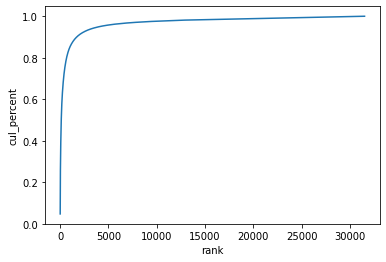

In [81]:
# 단어의 누적 분포 그래프 그리기

sns.lineplot(x='rank', y='cul_percent', data=wc_real_pp2);

In [82]:
# 상위 랭크 몇개가 전체 단어의 몇퍼센트를 차지하는지 확인

wc_real_pp2[wc_real_pp2['rank'] <= 1000]['cul_percent'].max()

# wc_real_pp2[wc_real_pp2['rank'] <= 2000]['cul_percent'].max()    ## 0.911
# wc_real_pp2[wc_real_pp2['rank'] <= 2500]['cul_percent'].max()    ## 0.925
# wc_real_pp2[wc_real_pp2['rank'] <= 3000]['cul_percent'].max()    ## 0.935
# wc_real_pp2[wc_real_pp2['rank'] <= 4000]['cul_percent'].max()    ## 0.949
# wc_real_pp2[wc_real_pp2['rank'] <= 5000]['cul_percent'].max()    ## 0.957

0.851158865402827

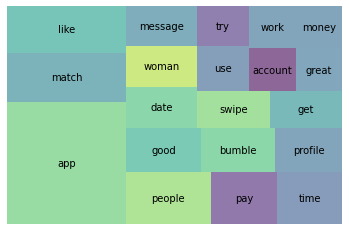

In [83]:
# Squarify 라이브러리를 사용 -> 등장 비율 상위 20개 단어의 결과를 시각화

wc_real_pp2_top20 = wc_real_pp2[wc_real_pp2['rank'] <= 20]
squarify.plot(sizes=wc_real_pp2_top20['percent'], label=wc_real_pp2_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

In [43]:
# 문장으로 붙여서 하나의 리스트에 넣기 (wordcloud 만들 때 & 마지막 데이터프레임으로 만들 때 필요)

content_pp2 = []
for text in df_new_rev3['content_pp1']:
  content_pp2.append(pp2(text))

In [44]:
df_new_rev4 = pd.DataFrame({'content':content_pp2, 'score':df_new_rev3['score']})
df_new_rev4.head(5)

# len(df_new_rev4)
# 87086

content  score
0           funny match pay week sudden get blow      1
1                                 fun experience      4
2  pay good hide people near use filter distance      1
3                                   try app lame      1
4                                give cold pizza      5

In [45]:
df_new_rev4

content  score
0                   funny match pay week sudden get blow      1
1                                         fun experience      4
2          pay good hide people near use filter distance      1
3                                           try app lame      1
4                                        give cold pizza      5
...                                                  ...    ...
87081  operate system autorotation image disabled gal...      2
87082                                            finally      5
87083                                            finally      5
87084  finally app woman start conversation love conc...      4
87085                                    android version      5

[87086 rows x 2 columns]

In [46]:
# 공백데이터 있는지 확인: 불용어만 존재한 데이터가 제거단계를 거치면서 빈 데이터로 남게된것으로 보인다. 163의 빈 데이터가 생겼음.

df_new_rev4[df_new_rev4['content']=='']

content  score
44                 5
170                1
194                1
1263               4
1580               1
...       ...    ...
84143              1
84608              4
84779              1
84984              5
85739              5

[163 rows x 2 columns]

In [47]:
empty_check_df_new_rev4 = [index for index, sentence in enumerate(df_new_rev4['content']) if len(sentence) < 1]
print(len(empty_check_df_new_rev4))

163


In [48]:
empty_check_df_new_rev4[:3] # 3개만 확인해보자

[44, 170, 194]

In [49]:
print(df_new_rev4['content'][44])
print(df_new_rev4['content'][170])
print(df_new_rev4['content'][194])

In [50]:
# 빈 데이터들을 제거 후 인덱스 리셋 실행

df_new_rev5 = df_new_rev4.drop(empty_check_df_new_rev4, axis=0)
df_new_rev5.reset_index(drop=True, inplace=True)
df_new_rev5.head(5)

content  score
0           funny match pay week sudden get blow      1
1                                 fun experience      4
2  pay good hide people near use filter distance      1
3                                   try app lame      1
4                                give cold pizza      5

In [51]:
print("제거후: ", len(df_new_rev5))
print("제거전: ", len(df_new_rev4))
print("검산결과: ", len(df_new_rev5)+len(empty_check_df_new_rev4))

제거후:  86923
제거전:  87086
검산결과:  87086


In [52]:
# 공백데이터 있는지 확인: 없음.

df_new_rev5[df_new_rev5['content']=='']

Empty DataFrame
Columns: [content, score]
Index: []

In [53]:
# 결측치 확인: 없음.

df_new_rev5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86923 entries, 0 to 86922
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  86923 non-null  object
 1   score    86923 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


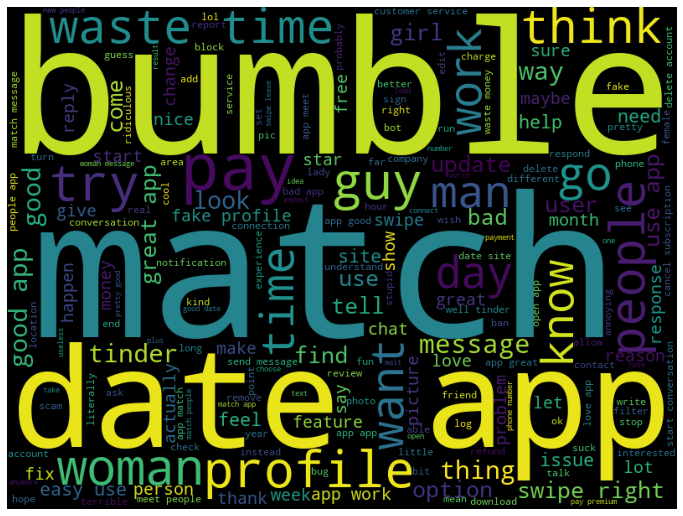

In [ ]:
# 텍스트 리뷰에 가장 많이 사용된 단어 워드클라우드로 확인
# '문장으로 붙였을 때' 버전으로 적용해야함!

cloud = WordCloud(width=800, height=600).generate(" ".join(df_new_rev5['content']))
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis('off');

## 3) 레이블 - 라벨 인코딩

In [54]:
# from sklearn.preprocessing import LabelEncoder

In [55]:
# 레이블 만들어 주기 - group A (3점 => 긍정)
#    1, 2점 -> 0 (부정)
# 3, 4, 5점 -> 1 (긍정)

condlist = [df_new_rev5['score'] > 2]
choicelist = [1]
df_new_rev5['label_a'] = np.select(condlist, choicelist, default=0)

df_new_rev5.head(7)

content  score  label_a
0               funny match pay week sudden get blow      1        0
1                                     fun experience      4        1
2      pay good hide people near use filter distance      1        0
3                                       try app lame      1        0
4                                    give cold pizza      5        1
5  lind interfaz fcil de usar odio la ubicacin de...      4        1
6       ban account bumble time chat good fun people      3        1

In [56]:
# target 분포 확인하기

df_new_rev5['label_a'].value_counts(normalize=True)

0    0.563844
1    0.436156
Name: label_a, dtype: float64

In [57]:
df_new_rev5_label_a = df_new_rev5['label_a'].value_counts()
df_new_rev5_label_a

0    49011
1    37912
Name: label_a, dtype: int64

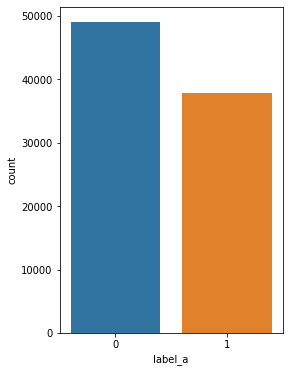

In [104]:
plt.figure(figsize=(4, 6))
sns.countplot(x='label_a', data=df_new_rev5)
# sns.countplot(y='label_a', data=df_new_rev5, orient='h')  # 가로  # order = df_new['score'].value_counts().index ---> 값을 기준으로 정렬할 때

plt.show();

In [58]:
# 레이블 만들어 주기 - group B (3점 => 중립)
# 1, 2점 -> 0 (부정)
#    3점 -> 1 (중립)
# 4, 5점 -> 2 (긍정)

condlist = [df_new_rev5['score'] > 3, df_new_rev5['score'] < 3]
choicelist = [2, 0]
df_new_rev5['label_b'] = np.select(condlist, choicelist, default=1)

df_new_rev5.head(7)

content  score  label_a  label_b
0               funny match pay week sudden get blow      1        0        0
1                                     fun experience      4        1        2
2      pay good hide people near use filter distance      1        0        0
3                                       try app lame      1        0        0
4                                    give cold pizza      5        1        2
5  lind interfaz fcil de usar odio la ubicacin de...      4        1        2
6       ban account bumble time chat good fun people      3        1        1

In [59]:
# target 분포 확인하기

df_new_rev5['label_b'].value_counts(normalize=True)

0    0.563844
2    0.343442
1    0.092714
Name: label_b, dtype: float64

In [60]:
df_new_rev5_label_b = df_new_rev5['label_b'].value_counts()
df_new_rev5_label_b

0    49011
2    29853
1     8059
Name: label_b, dtype: int64

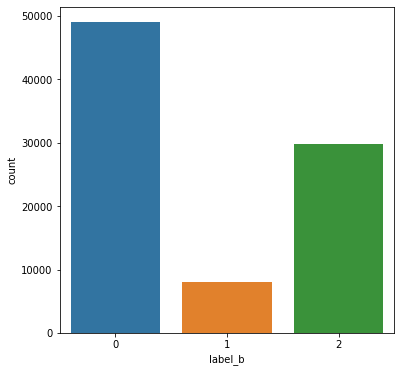

In [61]:
plt.figure(figsize=(6, 6))
sns.countplot(x='label_b', data=df_new_rev5)
# sns.countplot(y='label_b', data=df_new_rev5, orient='h')  # 가로   # order = df_new['score'].value_counts().index ---> 값을 기준으로 정렬할 때

plt.show();

In [109]:
# 지금까지 전처리한 데이터 바탕으로 깨끗하게 새로운 데이터프레임으로 저장해두기 - Group A

df_clean_a = pd.DataFrame({'content':df_new_rev5['content'], 'label':df_new_rev5['label_a']})
df_clean_a.head(3)

# len(df_clean_a)
# 86923

content  label
0           funny match pay week sudden get blow      0
1                                 fun experience      1
2  pay good hide people near use filter distance      0

In [205]:
# 지금까지 전처리한 데이터 바탕으로 깨끗하게 새로운 데이터프레임으로 저장해두기 - Group B

df_clean_b = pd.DataFrame({'content':df_new_rev5['content'], 'label':df_new_rev5['label_b']})
df_clean_b.head(3)

# len(df_clean_b)
# 86923

content  label
0           funny match pay week sudden get blow      0
1                                 fun experience      2
2  pay good hide people near use filter distance      0

In [65]:
# 지금까지 전처리한 데이터 바탕으로 깨끗하게 새로운 데이터프레임으로 저장해두기 - 합친거

df_clean = pd.DataFrame({'content':df_new_rev5['content'], 'label_a':df_new_rev5['label_a'], 'label_b':df_new_rev5['label_b']})
df_clean.head(3)

content  label_a  label_b
0           funny match pay week sudden get blow        0        0
1                                 fun experience        1        2
2  pay good hide people near use filter distance        0        0

In [66]:
# df_clean_a_original = df_clean_a.copy()
# df_clean_b_original = df_clean_b.copy()
df_clean_original = df_clean.copy()

# **데이터 분리 & 벡터화(Group A)**

In [67]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Dense, Activation, Dropout, Input, Layer
from tensorflow.keras.layers import SimpleRNN, LSTM, GlobalMaxPooling1D, GlobalAveragePooling1D

In [68]:
np.random.seed(42)
tf.random.set_seed(42)

In [69]:
# 데이터셋 분리

target_a = 'label_a'
target_b = 'label_b'
feature = 'content'

X_train, X_test, y_train, y_test = train_test_split(df_clean[feature], df_clean[target_a], test_size=0.2, stratify=df_clean[target_a], random_state=42)  # 타겟 클래스의 불균형을 고려해서 분리

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(69538,)
(17385,)
(69538,)
(17385,)


In [70]:
# train 데이터의 타겟 클래스 비율

y_train.value_counts(normalize=True)

0    0.56385
1    0.43615
Name: label_a, dtype: float64

In [71]:
# test 데이터의 타겟 클래스 비율

y_test.value_counts(normalize=True)

0    0.563819
1    0.436181
Name: label_a, dtype: float64

In [72]:
## 가장 빈도높은 10972개 단어만 사용한다
## 하지만 tokenizer 에 넣는 값에는 +1 해주어야 한다. 왜냐하면 케라스의 0번 패딩때문에! 결과적으로 토큰을 만들때는 최빈단어 10972개의 단어만 사용하게 될것.

max_words = 10973

tokenizer = Tokenizer(num_words=max_words)       ## Tokenizer 객체 만들기 (한번만 만들기)
tokenizer.fit_on_texts(X_train)                  ## 정수 인덱스 구축하기 by 빈도수 높은 단어가 낮은 숫자 순으로 매칭 됨. (리스트 형태가 입력되어야하고, 학습데이터에만 적용하여야 한다. 테스트데이터에도 따로 해주면 인덱스 자체가 달려져서 모델에 정상적으로 적용 불가)

word_vocab = tokenizer.word_index                ## 정수 인덱스 매칭이 완료된 어휘집합 확인하기
word_count = tokenizer.word_counts               ## 각 단어 빈도수 확인하기

In [73]:
print('어휘집합: ', word_vocab)
print('어휘집합 내 단어갯수: ', len(word_vocab))

## num_word = 5000 인데, 왜 word_index는 5000개가 넘는 걸까? 5000개 갖고만 만들어주는거 아니었어?
## num_words =3 이든 num_words=100 이든, word_index는 같은 아웃풋을 낸다. 왜나면 word_index는 단순히 num_words가 몇이냐에 관계없이 최초 말뭉치 전체에 대해 매핑한다.
## num_words 는 texts_to_sequences 를 호출할 때 반영되는 것! 

어휘집합:  {'app': 1, 'match': 2, 'like': 3, 'people': 4, 'pay': 5, 'time': 6, 'good': 7, 'bumble': 8, 'profile': 9, 'date': 10, 'woman': 11, 'message': 12, 'swipe': 13, 'get': 14, 'use': 15, 'try': 16, 'account': 17, 'great': 18, 'work': 19, 'money': 20, 'day': 21, 'want': 22, 'tinder': 23, 'meet': 24, 'find': 25, 'say': 26, 'way': 27, 'guy': 28, 'go': 29, 'bad': 30, 'waste': 31, 'look': 32, 'fake': 33, 'man': 34, 'think': 35, 'girl': 36, 'month': 37, 'subscription': 38, 'right': 39, 'delete': 40, 'let': 41, 'new': 42, 'know': 43, 'free': 44, 'lot': 45, 'charge': 46, 'love': 47, 'notification': 48, 'need': 49, 'well': 50, 'user': 51, 'easy': 52, 'far': 53, 'nice': 54, 'send': 55, 'option': 56, 'premium': 57, 'week': 58, 'update': 59, 'thing': 60, 'feature': 61, 'tell': 62, 'make': 63, 'site': 64, 'talk': 65, 'hour': 66, 'start': 67, 'facebook': 68, 'conversation': 69, 'cancel': 70, 'service': 71, 'friend': 72, 'picture': 73, 'actually': 74, 'take': 75, 'photo': 76, 'show': 77, 'keep': 78,

In [74]:
print('어휘집합: ', sorted(word_count.items(), key=lambda x: x[1], reverse=True))
print('어휘집합 내 단어갯수: ', len(word_count))

## 위 셀의 정수 인덱스는 전체 훈련 데이터에서 등장 빈도수가 높은 순서대로 부여되었기 때문에, 높은 정수가 부여된 단어들은 등장 빈도수가 매우 낮다.
## 빈도수가 낮은 단어들은 오타일 확률도 있고, 큰 의미가 없는 단어일 확률이 높다.
## 따라서 먼저 등장 빈도수가 2회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인 후 배제하는 방향으로 결정!

어휘집합:  [('app', 38005), ('match', 15422), ('like', 14471), ('people', 11426), ('pay', 9070), ('time', 8784), ('good', 8650), ('bumble', 8618), ('profile', 7845), ('date', 7675), ('woman', 7608), ('message', 7476), ('swipe', 7024), ('get', 6856), ('use', 6234), ('try', 5345), ('account', 5319), ('great', 5272), ('work', 5232), ('money', 5045), ('day', 4992), ('want', 4917), ('tinder', 4524), ('meet', 4032), ('find', 3762), ('say', 3738), ('way', 3577), ('guy', 3543), ('go', 3475), ('bad', 3473), ('waste', 3278), ('look', 3265), ('fake', 3170), ('man', 3111), ('think', 3037), ('girl', 3002), ('month', 2976), ('subscription', 2909), ('right', 2894), ('delete', 2860), ('let', 2854), ('new', 2849), ('know', 2848), ('free', 2837), ('lot', 2717), ('charge', 2586), ('love', 2561), ('notification', 2540), ('need', 2504), ('well', 2487), ('user', 2443), ('easy', 2397), ('far', 2355), ('nice', 2316), ('send', 2294), ('option', 2283), ('premium', 2266), ('week', 2236), ('update', 2223), ('thing', 

In [75]:
threshold = 2
total_count = len(word_vocab) # 어휘집합 내 단어갯수
rare_count = 0                # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0                # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0                 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in word_count.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_count = rare_count + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_count)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_count))
print("단어 집합에서 희귀 단어의 비율:", (rare_count / total_count)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 27581
등장 빈도가 1번 이하인 희귀 단어의 수: 16609
단어 집합에서 희귀 단어의 비율: 60.218991334614415
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.0738230564073876


In [76]:
# 등장 빈도가 threshold 값인 2회 미만. 즉, 1회인 단어들은 단어 집합에서 무려 약 60%로 절반 이상을 차지한다.
# 하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 약 2%밖에 되지 않는다.
# 즉 등장 빈도가 1회인 단어들은 크게 중요하지 않을 것으로 예상된다. 그래서 이 단어들은 정수 인코딩 과정에서 배제하기로 한다.
# 전체 단어 개수 중 빈도수 1회인 단어를 제외한 단어의 개수를 단어 집합의 최대 크기로 제한한다.
# 0번 패딩 토큰을 고려하여 + 1

vocab_size = total_count - rare_count + 1
print('단어 집합의 크기 :',vocab_size)     # 171번 셀 max_words 숫자의 근거임.

단어 집합의 크기 : 10973


In [77]:
train_text_seq = tokenizer.texts_to_sequences(X_train)    ## train 데이터 문자열을 정수 인덱스로 변환하여 리스트로 만들기
test_text_seq = tokenizer.texts_to_sequences(X_test)      ## test  데이터 문자열을 정수 인덱스로 변환하여 리스트로 만들기

print(train_text_seq[0])
print(train_text_seq[1])

[1412, 402, 12, 26, 12, 28, 77, 311, 6, 3, 99, 6, 55, 12]
[1457, 144, 26, 189, 11, 22, 28, 65, 96, 45, 50, 23]


In [78]:
# 빈 샘플 확인하기
# 전체 데이터에서 빈도수가 낮은 단어를 사용하지 않기로 했다 -> 빈도수가 낮은 단어만으로 구성되었던 샘플들은 빈 샘플이 되었다는 것을 의미.
# 빈 샘플들은 어떤 레이블이 붙어있던 의미가 없으므로 빈 샘플들이 있는지 확인하고 있다면 제거해주는 작업 필요.
# 각 샘플들의 길이를 확인해서 길이가 0인 샘플들의 인덱스 받아오기.
# drop_train에는 X_train으로부터 얻은 빈 샘플들의 인덱스가 저장.

drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_train

[]

In [79]:
len(drop_train) # 빈도수가 낮은 단어만으로 구성되었던 샘플이 하나도 없음. 제거할 게 없음.

0

In [80]:
# 결측치, 중복값1차만 한 처음 데이터에서 텍스트 하나당 단어 갯수 평균 값인 = 26 과 근사한 30으로 설정할까?
# 혹은 평균말고 중간값? 혹은 어떤 특정 값? 무엇으로 해야할지 고민
# 대부분의 리뷰가 내용이 잘리지 않도록 할 수 있는 최적의 max_len의 값은 몇일까?
# 전체 샘플 중 길이가 max_len 이하인 샘플의 비율이 몇 %인지 확인하는 함수 만들어서 확인하기

X_train 리뷰 길이 최대값: 2031
X_train 리뷰 길이 평균값: 72.09688228019212


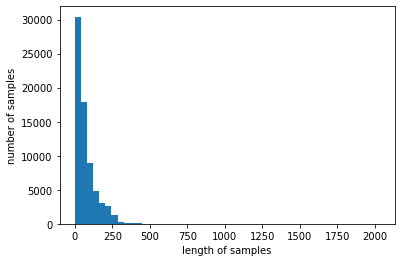

In [126]:
print('X_train 리뷰 길이 최대값:',max(len(review) for review in X_train))
print('X_train 리뷰 길이 평균값:',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

X_train 리뷰 길이 최대값: 956
X_train 리뷰 길이 평균값: 71.68006902502157


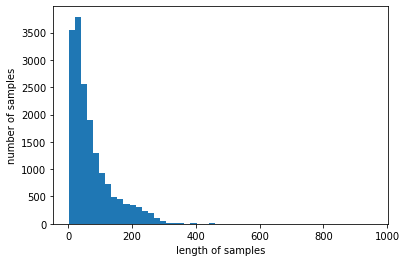

In [127]:
print('X_test 리뷰 길이 최대값:',max(len(review) for review in X_test))
print('X_test 리뷰 길이 평균값:',sum(map(len, X_test))/len(X_test))
plt.hist([len(review) for review in X_test], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [81]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [82]:
max_len = 120
below_threshold_len(max_len, X_test)

전체 샘플 중 길이가 120 이하인 샘플의 비율: 81.90969226344549


In [83]:
train_seq_matrix = pad_sequences(train_text_seq, maxlen=max_len)    ## train 데이터 pad_sequence 를 통해 패딩 처리
test_seq_matrix = pad_sequences(test_text_seq, maxlen=max_len)    ## test 데이터 pad_sequence 를 통해 패딩 처리

print(train_seq_matrix[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0 1412  402   12   26   12   28
   77  311    6    3   99    6   55   12]


In [84]:
max_features = 10973   # max_words 값과 동일하게 설정

# **모델학습(Group A)**

## 1) MLP

In [136]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(GlobalAveragePooling1D())
# model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          702272    
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 702,337
Trainable params: 702,337
Non-trainable params: 0
_________________________________________________________________


In [137]:
history = model.fit(train_seq_matrix, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
870/870 [==============================] - 10s 10ms/step - loss: 0.6081 - accuracy: 0.6899 - val_loss: 0.5186 - val_accuracy: 0.7784
Epoch 2/10
870/870 [==============================] - 12s 14ms/step - loss: 0.4621 - accuracy: 0.8157 - val_loss: 0.4494 - val_accuracy: 0.8142
Epoch 3/10
870/870 [==============================] - 9s 10ms/step - loss: 0.4157 - accuracy: 0.8312 - val_loss: 0.4270 - val_accuracy: 0.8204
Epoch 4/10
870/870 [==============================] - 10s 11ms/step - loss: 0.3958 - accuracy: 0.8386 - val_loss: 0.4178 - val_accuracy: 0.8211
Epoch 5/10
870/870 [==============================] - 9s 10ms/step - loss: 0.3830 - accuracy: 0.8439 - val_loss: 0.4130 - val_accuracy: 0.8238
Epoch 6/10
870/870 [==============================] - 9s 11ms/step - loss: 0.3739 - accuracy: 0.8471 - val_loss: 0.4109 - val_accuracy: 0.8250
Epoch 7/10
870/870 [==============================] - 9s 11ms/step - loss: 0.3667 - accuracy: 0.8501 - val_loss: 0.4106 - val_accuracy: 0.8

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

In [134]:
history = model.fit(train_seq_matrix, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
870/870 [==============================] - 11s 11ms/step - loss: 0.5052 - accuracy: 0.7508 - val_loss: 0.4167 - val_accuracy: 0.8167
Epoch 2/10
870/870 [==============================] - 9s 11ms/step - loss: 0.3843 - accuracy: 0.8359 - val_loss: 0.4253 - val_accuracy: 0.8028
Epoch 3/10
870/870 [==============================] - 9s 11ms/step - loss: 0.3601 - accuracy: 0.8442 - val_loss: 0.4032 - val_accuracy: 0.8172
Epoch 4/10
870/870 [==============================] - 10s 12ms/step - loss: 0.3422 - accuracy: 0.8553 - val_loss: 0.3910 - val_accuracy: 0.8263
Epoch 5/10
870/870 [==============================] - 10s 12ms/step - loss: 0.3294 - accuracy: 0.8607 - val_loss: 0.3969 - val_accuracy: 0.8229
Epoch 6/10
870/870 [==============================] - 9s 11ms/step - loss: 0.3190 - accuracy: 0.8658 - val_loss: 0.4062 - val_accuracy: 0.8237
Epoch 7/10
870/870 [==============================] - 13s 15ms/step - loss: 0.3108 - accuracy: 0.8679 - val_loss: 0.4001 - val_accuracy: 0.

## 2) SimpleRNN

In [138]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          702272    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 710,593
Trainable params: 710,593
Non-trainable params: 0
_________________________________________________________________


In [139]:
history = model.fit(train_seq_matrix, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
870/870 [==============================] - 40s 45ms/step - loss: 0.4483 - accuracy: 0.7906 - val_loss: 0.4116 - val_accuracy: 0.8172
Epoch 2/10
870/870 [==============================] - 39s 45ms/step - loss: 0.3446 - accuracy: 0.8561 - val_loss: 0.4432 - val_accuracy: 0.8053
Epoch 3/10
870/870 [==============================] - 39s 45ms/step - loss: 0.2727 - accuracy: 0.8900 - val_loss: 0.4466 - val_accuracy: 0.8209
Epoch 4/10
870/870 [==============================] - 39s 45ms/step - loss: 0.2147 - accuracy: 0.9144 - val_loss: 0.5137 - val_accuracy: 0.8021
Epoch 5/10
870/870 [==============================] - 39s 45ms/step - loss: 0.1815 - accuracy: 0.9279 - val_loss: 0.5698 - val_accuracy: 0.8005
Epoch 6/10
870/870 [==============================] - 39s 45ms/step - loss: 0.1608 - accuracy: 0.9358 - val_loss: 0.6081 - val_accuracy: 0.7991
Epoch 7/10
870/870 [==============================] - 39s 45ms/step - loss: 0.1480 - accuracy: 0.9411 - val_loss: 0.6605 - val_accuracy:

## 3) LSTM

### 임베딩 차원: 64 / 배치: 64

In [140]:
model = Sequential()
model.add(Embedding(max_features,64))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          702272    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 735,361
Trainable params: 735,361
Non-trainable params: 0
_________________________________________________________________


In [141]:
history = model.fit(train_seq_matrix, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
870/870 [==============================] - 94s 106ms/step - loss: 0.4128 - accuracy: 0.8128 - val_loss: 0.3834 - val_accuracy: 0.8264
Epoch 2/10
870/870 [==============================] - 91s 104ms/step - loss: 0.3353 - accuracy: 0.8560 - val_loss: 0.3805 - val_accuracy: 0.8263
Epoch 3/10
870/870 [==============================] - 91s 104ms/step - loss: 0.3048 - accuracy: 0.8689 - val_loss: 0.3958 - val_accuracy: 0.8250
Epoch 4/10
870/870 [==============================] - 91s 105ms/step - loss: 0.2766 - accuracy: 0.8806 - val_loss: 0.4142 - val_accuracy: 0.8211
Epoch 5/10
870/870 [==============================] - 91s 104ms/step - loss: 0.2522 - accuracy: 0.8920 - val_loss: 0.4640 - val_accuracy: 0.8214
Epoch 6/10
870/870 [==============================] - 90s 104ms/step - loss: 0.2317 - accuracy: 0.9015 - val_loss: 0.4958 - val_accuracy: 0.8131
Epoch 7/10
870/870 [==============================] - 91s 104ms/step - loss: 0.2129 - accuracy: 0.9095 - val_loss: 0.5134 - val_ac

### 임베딩 차원: 64 / 배치: 128

In [144]:
model = Sequential()
model.add(Embedding(max_features,64))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 64)          702272    
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 735,361
Trainable params: 735,361
Non-trainable params: 0
_________________________________________________________________


In [145]:
history = model.fit(train_seq_matrix, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
435/435 [==============================] - 82s 184ms/step - loss: 0.4249 - accuracy: 0.8065 - val_loss: 0.3874 - val_accuracy: 0.8256
Epoch 2/10
435/435 [==============================] - 70s 162ms/step - loss: 0.3411 - accuracy: 0.8526 - val_loss: 0.3852 - val_accuracy: 0.8256
Epoch 3/10
435/435 [==============================] - 69s 159ms/step - loss: 0.3153 - accuracy: 0.8649 - val_loss: 0.3896 - val_accuracy: 0.8254
Epoch 4/10
435/435 [==============================] - 69s 158ms/step - loss: 0.2934 - accuracy: 0.8732 - val_loss: 0.4030 - val_accuracy: 0.8246
Epoch 5/10
435/435 [==============================] - 69s 158ms/step - loss: 0.2733 - accuracy: 0.8814 - val_loss: 0.4277 - val_accuracy: 0.8205
Epoch 6/10
435/435 [==============================] - 69s 158ms/step - loss: 0.2553 - accuracy: 0.8901 - val_loss: 0.4611 - val_accuracy: 0.8171
Epoch 7/10
435/435 [==============================] - 69s 159ms/step - loss: 0.2416 - accuracy: 0.8942 - val_loss: 0.4794 - val_ac

### 임베딩 차원: 128 / 배치: 64


In [142]:
model = Sequential()
model.add(Embedding(max_features,128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 128)         1404544   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,536,257
Trainable params: 1,536,257
Non-trainable params: 0
_________________________________________________________________


In [143]:
history = model.fit(train_seq_matrix, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
870/870 [==============================] - 263s 299ms/step - loss: 0.4078 - accuracy: 0.8139 - val_loss: 0.3863 - val_accuracy: 0.8237
Epoch 2/10
870/870 [==============================] - 256s 295ms/step - loss: 0.3324 - accuracy: 0.8560 - val_loss: 0.3847 - val_accuracy: 0.8252
Epoch 3/10
870/870 [==============================] - 256s 295ms/step - loss: 0.2986 - accuracy: 0.8711 - val_loss: 0.3994 - val_accuracy: 0.8248
Epoch 4/10
870/870 [==============================] - 256s 294ms/step - loss: 0.2689 - accuracy: 0.8848 - val_loss: 0.4238 - val_accuracy: 0.8178
Epoch 5/10
870/870 [==============================] - 256s 294ms/step - loss: 0.2443 - accuracy: 0.8945 - val_loss: 0.4727 - val_accuracy: 0.8194
Epoch 6/10
870/870 [==============================] - 255s 293ms/step - loss: 0.2217 - accuracy: 0.9060 - val_loss: 0.5088 - val_accuracy: 0.8129
Epoch 7/10
870/870 [==============================] - 255s 293ms/step - loss: 0.2085 - accuracy: 0.9115 - val_loss: 0.5137 -

### 임베딩 차원: 128 / 배치: 128


In [146]:
model = Sequential()
model.add(Embedding(max_features,128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 128)         1404544   
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,536,257
Trainable params: 1,536,257
Non-trainable params: 0
_________________________________________________________________


In [147]:
history = model.fit(train_seq_matrix, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
435/435 [==============================] - 213s 477ms/step - loss: 0.4179 - accuracy: 0.8076 - val_loss: 0.3879 - val_accuracy: 0.8245
Epoch 2/10
435/435 [==============================] - 202s 465ms/step - loss: 0.3371 - accuracy: 0.8553 - val_loss: 0.3822 - val_accuracy: 0.8264
Epoch 3/10
435/435 [==============================] - 202s 465ms/step - loss: 0.3058 - accuracy: 0.8688 - val_loss: 0.3936 - val_accuracy: 0.8242
Epoch 4/10
435/435 [==============================] - 203s 467ms/step - loss: 0.2764 - accuracy: 0.8815 - val_loss: 0.4116 - val_accuracy: 0.8228
Epoch 5/10
435/435 [==============================] - 204s 468ms/step - loss: 0.2500 - accuracy: 0.8934 - val_loss: 0.4467 - val_accuracy: 0.8193
Epoch 6/10
435/435 [==============================] - 203s 466ms/step - loss: 0.2309 - accuracy: 0.9026 - val_loss: 0.4954 - val_accuracy: 0.8117
Epoch 7/10
435/435 [==============================] - 212s 488ms/step - loss: 0.2121 - accuracy: 0.9098 - val_loss: 0.5211 -

### 임베딩 차원: 128 / 배치: 128 / dense 층 추가


In [154]:
model = Sequential()
model.add(Embedding(max_features,128))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 128)         1404544   
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,544,449
Trainable params: 1,544,449
Non-trainable params: 0
_________________________________________________________________


In [155]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm2.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
435/435 [==============================] - 207s 470ms/step - loss: 0.4157 - accuracy: 0.8075 - val_loss: 0.3910 - val_accuracy: 0.8263
Epoch 2/15
435/435 [==============================] - 204s 469ms/step - loss: 0.3324 - accuracy: 0.8563 - val_loss: 0.3819 - val_accuracy: 0.8282
Epoch 3/15
435/435 [==============================] - 203s 466ms/step - loss: 0.2938 - accuracy: 0.8727 - val_loss: 0.3982 - val_accuracy: 0.8220
Epoch 4/15
435/435 [==============================] - 202s 465ms/step - loss: 0.2620 - accuracy: 0.8869 - val_loss: 0.4313 - val_accuracy: 0.8157
Epoch 5/15
435/435 [==============================] - 203s 466ms/step - loss: 0.2356 - accuracy: 0.8994 - val_loss: 0.4668 - val_accuracy: 0.8172
Epoch 6/15
435/435 [==============================] - 203s 468ms/step - loss: 0.2165 - accuracy: 0.9090 - val_loss: 0.5125 - val_accuracy: 0.8130
Epoch 7/15
435/435 [==============================] - 203s 466ms/step - loss: 0.1968 - accuracy: 0.9166 - val_loss: 0.5572 -

In [156]:
model = Sequential()
model.add(Embedding(max_features,128))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='binary_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 128)         1404544   
                                                                 
 lstm_8 (LSTM)               (None, 128)               131584    
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,544,449
Trainable params: 1,544,449
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [157]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm3.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
435/435 [==============================] - 206s 469ms/step - loss: 0.4126 - accuracy: 0.8107 - val_loss: 0.3904 - val_accuracy: 0.8267
Epoch 2/15
435/435 [==============================] - 203s 467ms/step - loss: 0.3330 - accuracy: 0.8561 - val_loss: 0.3989 - val_accuracy: 0.8167
Epoch 3/15
435/435 [==============================] - 203s 467ms/step - loss: 0.3003 - accuracy: 0.8709 - val_loss: 0.3952 - val_accuracy: 0.8236
Epoch 4/15
435/435 [==============================] - 202s 465ms/step - loss: 0.2683 - accuracy: 0.8849 - val_loss: 0.4259 - val_accuracy: 0.8205
Epoch 5/15
435/435 [==============================] - 205s 470ms/step - loss: 0.2412 - accuracy: 0.8966 - val_loss: 0.4547 - val_accuracy: 0.8159
Epoch 6/15
435/435 [==============================] - 202s 465ms/step - loss: 0.2201 - accuracy: 0.9066 - val_loss: 0.5085 - val_accuracy: 0.8108


In [151]:
model = Sequential()
model.add(Embedding(max_features,128))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='binary_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 128)         1404544   
                                                                 
 lstm_6 (LSTM)               (None, 128)               131584    
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,546,497
Trainable params: 1,546,497
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [153]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm1.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/15
435/435 [==============================] - 204s 470ms/step - loss: 0.4153 - accuracy: 0.8088 - val_loss: 0.3937 - val_accuracy: 0.8225
Epoch 2/15
435/435 [==============================] - 203s 467ms/step - loss: 0.3319 - accuracy: 0.8569 - val_loss: 0.5028 - val_accuracy: 0.8010
Epoch 3/15
435/435 [==============================] - 203s 466ms/step - loss: 0.2952 - accuracy: 0.8736 - val_loss: 0.3964 - val_accuracy: 0.8214
Epoch 4/15
435/435 [==============================] - 203s 468ms/step - loss: 0.2648 - accuracy: 0.8868 - val_loss: 0.4343 - val_accuracy: 0.8180
Epoch 5/15
435/435 [==============================] - 203s 467ms/step - loss: 0.2408 - accuracy: 0.8976 - val_loss: 0.4630 - val_accuracy: 0.8168
Epoch 6/15
435/435 [==============================] - 204s 469ms/step - loss: 0.2213 - accuracy: 0.9062 - val_loss: 0.5198 - val_accuracy: 0.8143
Epoch 7/15
435/435 [==============================] - 203s 467ms/step - loss: 0.2031 - accuracy: 0.9136 - val_loss: 0.5594 -

### 임베딩 차원: 128 / 배치: 256 / dense 층 추가 / 드롭아웃 적용

In [ ]:
model = Sequential()
model.add(Embedding(max_features,128))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='binary_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm4.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=15, batch_size=256, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

In [85]:
model = Sequential()
model.add(Embedding(max_features,64))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='binary_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          702272    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 737,409
Trainable params: 737,409
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [86]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm100.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=10, batch_size=256, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
218/218 [==============================] - 90s 404ms/step - loss: 0.4542 - accuracy: 0.7842 - val_loss: 0.3907 - val_accuracy: 0.8250
Epoch 2/10
218/218 [==============================] - 77s 354ms/step - loss: 0.3492 - accuracy: 0.8503 - val_loss: 0.3880 - val_accuracy: 0.8251
Epoch 3/10
218/218 [==============================] - 74s 341ms/step - loss: 0.3215 - accuracy: 0.8634 - val_loss: 0.3921 - val_accuracy: 0.8225
Epoch 4/10
218/218 [==============================] - 74s 340ms/step - loss: 0.3016 - accuracy: 0.8717 - val_loss: 0.4061 - val_accuracy: 0.8248
Epoch 5/10
218/218 [==============================] - 74s 340ms/step - loss: 0.2830 - accuracy: 0.8798 - val_loss: 0.4121 - val_accuracy: 0.8218


# **모델 평가(Group A)**

In [87]:
best_model_a = tf.keras.models.load_model('best-lstm100.h5')
best_model_a.evaluate(test_seq_matrix, y_test)

544/544 [==============================] - 10s 17ms/step - loss: 0.3796 - accuracy: 0.8332


[0.37961819767951965, 0.8331895470619202]

# **리뷰 예측(Group A)**

In [88]:
def sentiment_predict(text):
  # contractions 확장 처리
  expanded_text = contractions.fix(text)

  # 영어가 아닌 모든 것(숫자,특수문자,이모지 등) 제거
  complaints = re.sub("[^a-zA-Z ]","",expanded_text)

  # 소문자로 통일
  words = complaints.lower().split()

  # 불용어 제거 (spaCy)
  words = [x for x in words if not x in stopwords]
  clean_text = " ".join(words)

  # 표제어 처리 (spaCy)
  doc = en(clean_text)
  lemmas = []
  for token in doc:
    if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
      lemmas.append(token.lemma_)
  # clean_content = " ".join(lemmas)


  encoded = tokenizer.texts_to_sequences([lemmas])   # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(best_model_a.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [91]:
text_test1 = "It is a fun experience!"
text_test2 = "Why can i only pay with Google wallet"
sentiment_predict(text_test1)

97.15% 확률로 긍정 리뷰입니다.



In [92]:
sentiment_predict(text_test2)

89.73% 확률로 부정 리뷰입니다.



# **데이터 분리 & 벡터화(Group B)**

In [208]:
np.random.seed(42)
tf.random.set_seed(42)

In [93]:
# 데이터셋 분리

target_a = 'label_a'
target_b = 'label_b'
feature = 'content'

X_train, X_test, y_train, y_test = train_test_split(df_clean[feature], df_clean[target_b], test_size=0.2, stratify=df_clean[target_b], random_state=42)  # 타겟 클래스의 불균형을 고려해서 분리

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(69538,)
(17385,)
(69538,)
(17385,)


In [94]:
# train 데이터의 타겟 클래스 비율

y_train.value_counts(normalize=True)

0    0.563850
2    0.343438
1    0.092712
Name: label_b, dtype: float64

In [95]:
# test 데이터의 타겟 클래스 비율

y_test.value_counts(normalize=True)

0    0.563819
2    0.343457
1    0.092724
Name: label_b, dtype: float64

In [96]:
## 가장 빈도높은 10958개 단어만 사용한다
## 하지만 tokenizer 에 넣는 값에는 +1 해주어야 한다. 왜냐하면 케라스의 0번 패딩때문에! 결과적으로 토큰을 만들때는 최빈단어 10958개의 단어만 사용하게 될것.

max_words = 10959

tokenizer = Tokenizer(num_words=max_words)       ## Tokenizer 객체 만들기 (한번만 만들기)
tokenizer.fit_on_texts(X_train)                  ## 정수 인덱스 구축하기 by 빈도수 높은 단어가 낮은 숫자 순으로 매칭 됨. (리스트 형태가 입력되어야하고, 학습데이터에만 적용하여야 한다. 테스트데이터에도 따로 해주면 인덱스 자체가 달려져서 모델에 정상적으로 적용 불가)

word_vocab = tokenizer.word_index                ## 정수 인덱스 매칭이 완료된 어휘집합 확인하기
word_count = tokenizer.word_counts               ## 각 단어 빈도수 확인하기

In [97]:
print('어휘집합: ', word_vocab)
print('어휘집합 내 단어갯수: ', len(word_vocab))

어휘집합:  {'app': 1, 'match': 2, 'like': 3, 'people': 4, 'pay': 5, 'time': 6, 'good': 7, 'bumble': 8, 'profile': 9, 'date': 10, 'woman': 11, 'message': 12, 'swipe': 13, 'get': 14, 'use': 15, 'try': 16, 'account': 17, 'great': 18, 'work': 19, 'money': 20, 'day': 21, 'want': 22, 'tinder': 23, 'meet': 24, 'find': 25, 'say': 26, 'way': 27, 'guy': 28, 'go': 29, 'bad': 30, 'waste': 31, 'look': 32, 'fake': 33, 'man': 34, 'girl': 35, 'think': 36, 'month': 37, 'subscription': 38, 'right': 39, 'new': 40, 'know': 41, 'delete': 42, 'let': 43, 'free': 44, 'lot': 45, 'charge': 46, 'love': 47, 'need': 48, 'notification': 49, 'well': 50, 'user': 51, 'easy': 52, 'far': 53, 'nice': 54, 'option': 55, 'send': 56, 'premium': 57, 'thing': 58, 'make': 59, 'week': 60, 'update': 61, 'feature': 62, 'tell': 63, 'site': 64, 'talk': 65, 'hour': 66, 'conversation': 67, 'facebook': 68, 'cancel': 69, 'start': 70, 'service': 71, 'picture': 72, 'actually': 73, 'take': 74, 'friend': 75, 'photo': 76, 'keep': 77, 'show': 78,

In [98]:
print('어휘집합: ', sorted(word_count.items(), key=lambda x: x[1], reverse=True))
print('어휘집합 내 단어갯수: ', len(word_count))

## 위 셀의 정수 인덱스는 전체 훈련 데이터에서 등장 빈도수가 높은 순서대로 부여되었기 때문에, 높은 정수가 부여된 단어들은 등장 빈도수가 매우 낮다.
## 빈도수가 낮은 단어들은 오타일 확률도 있고, 큰 의미가 없는 단어일 확률이 높다.
## 따라서 먼저 등장 빈도수가 2회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인 후 배제하는 방향으로 결정!

어휘집합:  [('app', 38078), ('match', 15515), ('like', 14460), ('people', 11442), ('pay', 9087), ('time', 8801), ('good', 8776), ('bumble', 8573), ('profile', 7832), ('date', 7713), ('woman', 7609), ('message', 7474), ('swipe', 6992), ('get', 6861), ('use', 6227), ('try', 5370), ('account', 5342), ('great', 5222), ('work', 5218), ('money', 5050), ('day', 4986), ('want', 4919), ('tinder', 4509), ('meet', 4058), ('find', 3753), ('say', 3745), ('way', 3606), ('guy', 3600), ('go', 3481), ('bad', 3467), ('waste', 3285), ('look', 3265), ('fake', 3153), ('man', 3133), ('girl', 3035), ('think', 3018), ('month', 2977), ('subscription', 2917), ('right', 2892), ('new', 2873), ('know', 2861), ('delete', 2857), ('let', 2849), ('free', 2838), ('lot', 2731), ('charge', 2589), ('love', 2565), ('need', 2532), ('notification', 2519), ('well', 2501), ('user', 2462), ('easy', 2417), ('far', 2361), ('nice', 2326), ('option', 2316), ('send', 2289), ('premium', 2268), ('thing', 2230), ('make', 2228), ('week', 22

In [99]:
threshold = 2
total_count = len(word_vocab) # 어휘집합 내 단어갯수
rare_count = 0                # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0                # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0                 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in word_count.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_count = rare_count + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_count)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_count))
print("단어 집합에서 희귀 단어의 비율:", (rare_count / total_count)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 27487
등장 빈도가 1번 이하인 희귀 단어의 수: 16529
단어 집합에서 희귀 단어의 비율: 60.13388147124095
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.0620961795891275


In [100]:
# 등장 빈도가 threshold 값인 2회 미만. 즉, 1회인 단어들은 단어 집합에서 무려 약 60%로 절반 이상을 차지한다.
# 하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 약 2%밖에 되지 않는다.
# 즉 등장 빈도가 1회인 단어들은 크게 중요하지 않을 것으로 예상된다. 그래서 이 단어들은 정수 인코딩 과정에서 배제하기로 한다.
# 전체 단어 개수 중 빈도수 1회인 단어를 제외한 단어의 개수를 단어 집합의 최대 크기로 제한한다.
# 0번 패딩 토큰을 고려하여 + 1

vocab_size = total_count - rare_count + 1
print('단어 집합의 크기 :',vocab_size)     # 179번 셀 max_words 숫자의 근거임.

단어 집합의 크기 : 10959


In [101]:
train_text_seq = tokenizer.texts_to_sequences(X_train)    ## train 데이터 문자열을 정수 인덱스로 변환하여 리스트로 만들기
test_text_seq = tokenizer.texts_to_sequences(X_test)      ## test  데이터 문자열을 정수 인덱스로 변환하여 리스트로 만들기

print(train_text_seq[0])
print(train_text_seq[1])

[115, 375, 5621, 462, 68, 17, 21, 1891, 4, 68, 340, 450, 1, 204]
[1892, 28, 447, 28, 2384, 818]


In [102]:
# 빈 샘플 확인하기
# 전체 데이터에서 빈도수가 낮은 단어를 사용하지 않기로 했다 -> 빈도수가 낮은 단어만으로 구성되었던 샘플들은 빈 샘플이 되었다는 것을 의미.
# 빈 샘플들은 어떤 레이블이 붙어있던 의미가 없으므로 빈 샘플들이 있는지 확인하고 있다면 제거해주는 작업 필요.
# 각 샘플들의 길이를 확인해서 길이가 0인 샘플들의 인덱스 받아오기.
# drop_train에는 X_train으로부터 얻은 빈 샘플들의 인덱스가 저장.

drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_train

[]

In [103]:
len(drop_train) # 빈도수가 낮은 단어만으로 구성되었던 샘플이 하나도 없음. 제거할 게 없음.

0

X_train 리뷰 길이 최대값: 2031
X_train 리뷰 길이 평균값: 72.13358163881618


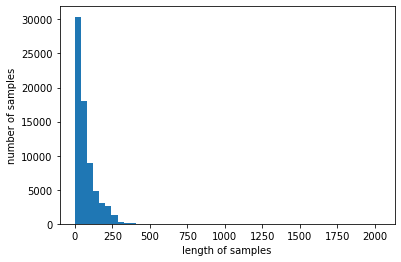

In [104]:
print('X_train 리뷰 길이 최대값:',max(len(review) for review in X_train))
print('X_train 리뷰 길이 평균값:',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

X_test 리뷰 길이 최대값: 973
X_test 리뷰 길이 평균값: 71.53327581248203


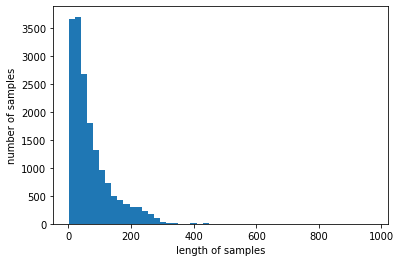

In [105]:
print('X_test 리뷰 길이 최대값:',max(len(review) for review in X_test))
print('X_test 리뷰 길이 평균값:',sum(map(len, X_test))/len(X_test))
plt.hist([len(review) for review in X_test], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [106]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [107]:
max_len = 120
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 120 이하인 샘플의 비율: 81.89910552503667


In [108]:
train_seq_matrix = pad_sequences(train_text_seq, maxlen=max_len)    ## train 데이터 pad_sequence 를 통해 패딩 처리
test_seq_matrix = pad_sequences(test_text_seq, maxlen=max_len)    ## test 데이터 pad_sequence 를 통해 패딩 처리

print(train_seq_matrix[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0  115  375 5621  462   68   17
   21 1891    4   68  340  450    1  204]


In [109]:
max_features = 10959   # max_words 값과 동일하게 설정

# **모델학습(Group B)**

In [110]:
model = Sequential()
model.add(Embedding(max_features,64))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          701376    
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 736,579
Trainable params: 736,579
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [111]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-lstm111.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq_matrix, y_train, epochs=10, batch_size=256, validation_split=0.2, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
218/218 [==============================] - 79s 353ms/step - loss: 0.6725 - accuracy: 0.7298 - val_loss: 0.5529 - val_accuracy: 0.7936
Epoch 2/10
218/218 [==============================] - 74s 337ms/step - loss: 0.5132 - accuracy: 0.8085 - val_loss: 0.5369 - val_accuracy: 0.7954
Epoch 3/10
218/218 [==============================] - 73s 334ms/step - loss: 0.4746 - accuracy: 0.8200 - val_loss: 0.5481 - val_accuracy: 0.7928
Epoch 4/10
218/218 [==============================] - 73s 337ms/step - loss: 0.4470 - accuracy: 0.8308 - val_loss: 0.5668 - val_accuracy: 0.7891
Epoch 5/10
218/218 [==============================] - 89s 411ms/step - loss: 0.4239 - accuracy: 0.8389 - val_loss: 0.5811 - val_accuracy: 0.7774


In [112]:
best_model_b = tf.keras.models.load_model('best-lstm111.h5')
best_model_b.evaluate(test_seq_matrix, y_test)

544/544 [==============================] - 10s 18ms/step - loss: 0.5389 - accuracy: 0.7997


[0.5389209389686584, 0.7997124195098877]